In [2]:
import os
import numpy as np
import torch
from PIL import Image
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

import gc
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
from torchvision.datasets import DatasetFolder, VisionDataset
# This is for the progress bar.
from tqdm.auto import tqdm
import random
from pathlib import Path
import math
import cv2
import matplotlib.pyplot as plt
from utils.gen_mask import gen_mask

In [3]:
def get_valid_data(labels):
    valid_data = []
    for i in range(len(labels)):
        for j in range(len(labels.iloc[i]['annotations'])):
            if labels.iloc[i]['annotations'][j]['type'] == "blood_vessel":
                valid_data.append(labels.iloc[i]['id'])
                break
    
    return valid_data

In [4]:
ROOT = Path("hubmap-hacking-the-human-vasculature")
polygon_file = "polygons.jsonl"
image_folder = "train"
metadata_file = "tile_meta.csv"
labels = pd.read_json(ROOT / "polygons.jsonl" , lines=True)
matadata = pd.read_csv(ROOT / "tile_meta.csv")
id_list = get_valid_data(labels)

In [7]:
import transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        # 水平翻轉
        # 
        # transforms.append(T.RandomIoUCrop())
        transforms.append(T.RandomHorizontalFlip(0.5))
        transforms.append(T.RandomZoomOut(side_range = (1,1.5)))
        transforms.append(T.RandomPhotometricDistort())
        # transforms.append(T.ScaleJitter((300,300)))
        transforms.append(T.RandomShortestSize(min_size = 250 , max_size = 400))
    return T.Compose(transforms)

0006ff2aa7cd


c:\vscode\ML\Kaggle_HuBMAP\utils\gen_mask.py:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  boxes = torch.as_tensor(boxes, dtype=torch.float32)
c:\Users\arthu\anaconda3\envs\ml\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the i

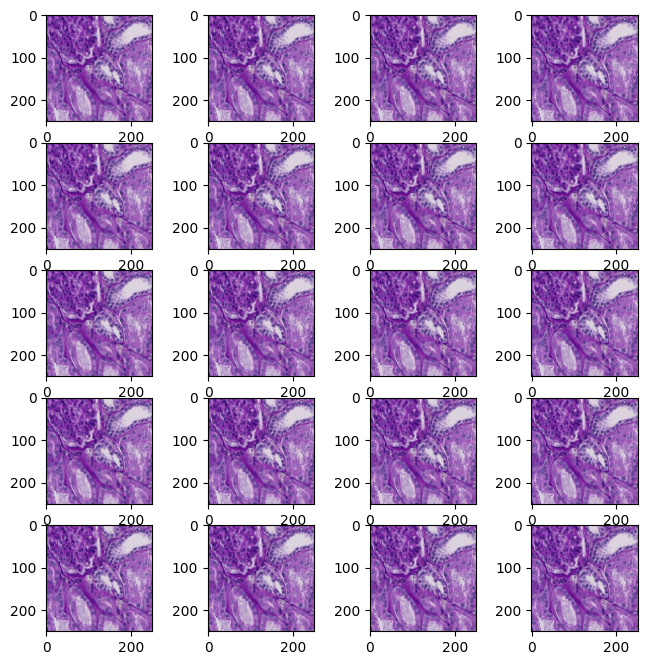

In [8]:
w = 10
h = 10
tfm = get_transform(True)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
print(id_list[0])
for i in range(1, columns*rows +1):
    # break
    annotations = labels[labels["id"] == id_list[0]]["annotations"].values[0]
    # print(annotations)
    boxes , masks , area = gen_mask(annotations)
    target = {}
    target["boxes"] = boxes
    target["area"] = area
    target["masks"] = masks
    target["labels"] = np.ones(len(boxes))
    im = Image.open(ROOT / "train" / f"{id_list[0]}.tif")
    
    im , target = tfm(im , target)
    fig.add_subplot(rows, columns, i)
    plt.imshow( im.permute(1, 2, 0))
    # plt.imshow(im)
plt.show()